In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from contamination_detection import contamination, feature_image
from __future__ import print_function
from ipywidgets import *
import ipywidgets as widgets
from IPython.display import display
from scipy import ndimage


path = "/home/natalija/Documents/HackZurich/contamination_detection/src/contamination1.jpg"
no_path = "/home/natalija/Documents/HackZurich//contamination_detection/src/no_contamination1.jpg"

image = cv2.imread(path)
no_image = cv2.imread(no_path, 0)

In [2]:
def display_img(tresh_min, tresh_max, iterations, k, path = "/home/natalija/Documents/HackZurich/contamination_detection/src/contamination1.jpg"):
    image_mask = feature_image(path, tresh_min, tresh_max, iterations, k)
    plt.axis('off')
    plt.imshow(image_mask, "gray")
    plt.show()
    return image_mask

In [3]:
interactive(display_img, tresh_min=100, tresh_max=100, iterations=3, k=3)

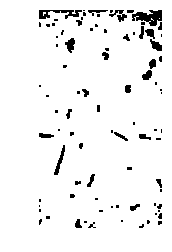

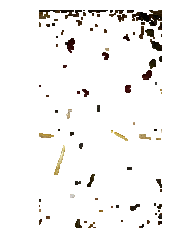

In [4]:
path = "/home/natalija/Documents/HackZurich/contamination_detection/src/contamination1.jpg"
image = cv2.imread(path)
img_mask = display_img(138, 217, 6, 7,path=path)


x, y = img_mask.shape

for i in range(x):
    for j in range(y): 
        if img_mask[i,j]!=0:
            image[i,j,:] = [255, 255, 255]
        
cv2.imwrite("/home/natalija/Documents/HackZurich/contamination_detection/src/new1.jpg", image)        
plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
plt.show()    

In [5]:
labeled, nr_objects = ndimage.label(1-img_mask)

In [6]:
d = {}
x,y = labeled.shape
for i in range(1,nr_objects+1): 
    d[i] = np.zeros((x,y,3))
    
for i in range(1,x): 
    for j in range(1,y): 
        if labeled[i,j]:
            d[labeled[i,j]][i,j,:] = image[i,j,:]

for key, value in d.items(): 
    non_empty_columns = np.where(value.max(axis=0)>0)[0]
    non_empty_rows = np.where(value.max(axis=1)>0)[0]
    cropBox = (min(non_empty_rows), max(non_empty_rows), min(non_empty_columns), max(non_empty_columns))
    image_data_new = value[cropBox[0]:cropBox[1]+1, cropBox[2]:cropBox[3]+1 , :]
    cv2.imwrite("/home/natalija/Documents/HackZurich/contamination_detection/src/image{}.png".format(key), image_data_new)

In [7]:
path1 = "/home/natalija/Documents/HackZurich/contamination_detection/src/beans/"
path2 =  "/home/natalija/Documents/HackZurich/contamination_detection/src/dried_bean/"
path3 =  "/home/natalija/Documents/HackZurich/contamination_detection/src/fines/"
path4 =  "/home/natalija/Documents/HackZurich/contamination_detection/src/grains/"
path5 =  "/home/natalija/Documents/HackZurich/contamination_detection/src/lentils/"
path6 =  "/home/natalija/Documents/HackZurich/contamination_detection/src/pumpkin/"
path7 =  "/home/natalija/Documents/HackZurich/contamination_detection/src/stones/"
path8 =   "/home/natalija/Documents/HackZurich/contamination_detection/src/straw/"

In [8]:
import glob

In [129]:
features = []
test_features = []
y = []
test_y=[]
import random

for filename in glob.glob('{}*.png'.format(path1)): #assuming gif
    im=cv2.imread(filename)
    vector = np.zeros(84645)
    new = np.concatenate((im[:,:,0].ravel(), im[:,:,1].ravel(), im[:,:,2].ravel()))
    vector[0:len(new)]=new
    if random.randint(0,100) < 80:
        features.append(np.array(vector))
        y.append(1)
    else:
        test_features.append(np.array(vector))
        test_y.append(1)
    
for filename in glob.glob('{}*.png'.format(path2)): #assuming gif
    im=cv2.imread(filename)
    vector = np.zeros(84645)
    new = np.concatenate((im[:,:,0].ravel(), im[:,:,1].ravel(), im[:,:,2].ravel()))
    vector[0:len(new)]=new
    if random.randint(0,100) < 80:
        features.append(np.array(vector))
        y.append(2)
    else:
        test_features.append(np.array(vector))
        test_y.append(2)
    
    
for filename in glob.glob('{}*.png'.format(path3)): #assuming gif
    vector = np.zeros(84645)
    new = np.concatenate((im[:,:,0].ravel(), im[:,:,1].ravel(), im[:,:,2].ravel()))
    vector[0:len(new)]=new
    if random.randint(0,100) < 80:
        features.append(np.array(vector))
        y.append(3)
    else:
        test_features.append(np.array(vector))
        test_y.append(3)
    

    
for filename in glob.glob('{}*.png'.format(path4)): #assuming gif
    im=cv2.imread(filename)
    vector = np.zeros(84645)
    new = np.concatenate((im[:,:,0].ravel(), im[:,:,1].ravel(), im[:,:,2].ravel()))
    vector[0:len(new)]=new
    if random.randint(0,100) < 80:
        features.append(np.array(vector))
        y.append(4)
    else:
        test_features.append(np.array(vector))
        test_y.append(4)

    
for filename in glob.glob('{}*.png'.format(path5)): #assuming gif
    im=cv2.imread(filename)
    vector = np.zeros(84645)
    new = np.concatenate((im[:,:,0].ravel(), im[:,:,1].ravel(), im[:,:,2].ravel()))
    vector[0:len(new)]=new
    if random.randint(0,100) < 80:
        features.append(np.array(vector))
        y.append(5)
    else:
        test_features.append(np.array(vector))
        test_y.append(5)

    
for filename in glob.glob('{}*.png'.format(path6)): #assuming gif
    im=cv2.imread(filename)
    vector = np.zeros(84645)
    new = np.concatenate((im[:,:,0].ravel(), im[:,:,1].ravel(), im[:,:,2].ravel()))
    vector[0:len(new)]=new
    if random.randint(0,100) < 80:
        features.append(np.array(vector))
        y.append(6)
    else:
        test_features.append(np.array(vector))
        test_y.append(6)

    
for filename in glob.glob('{}*.png'.format(path7)): #assuming gif
    im=cv2.imread(filename)
    vector = np.zeros(84645)
    new = np.concatenate((im[:,:,0].ravel(), im[:,:,1].ravel(), im[:,:,2].ravel()))
    vector[0:len(new)]=new
    if random.randint(0,100) < 80:
        features.append(np.array(vector))
        y.append(7)
    else:
        test_features.append(np.array(vector))
        test_y.append(7)


for filename in glob.glob('{}*.png'.format(path8)): 
    im=cv2.imread(filename)
    vector = np.zeros(84645)
    new = np.concatenate((im[:,:,0].ravel(), im[:,:,1].ravel(), im[:,:,2].ravel()))
    vector[0:len(new)]=new
    if random.randint(0,100) < 80:
        features.append(np.array(vector))
        y.append(8)
    else:
        test_features.append(np.array(vector))
        test_y.append(8)


In [130]:
def vector_feature_generation(img): 
    features = []
    
    #Whatch out the parameters
    img_mask = display_img(138, 217, 6, 7,path=path)
    x, y = img_mask.shape

    #NOT A MUST##################################################################################
    for i in range(x):
        for j in range(y): 
            if img_mask[i,j]!=0:
                image[i,j,:] = [255, 255, 255]
        
    cv2.imwrite("/home/natalija/Documents/HackZurich/contamination_detection/src/new1.jpg", image)  
    ##############################################################################################
    d = {}
    x,y = labeled.shape
    for i in range(1,nr_objects+1): 
        d[i] = np.zeros((x,y,3))

    for i in range(1,x): 
        for j in range(1,y): 
            if labeled[i,j]:
                d[labeled[i,j]][i,j,:] = image[i,j,:]

    for key, value in d.items(): 
        non_empty_columns = np.where(value.max(axis=0)>0)[0]
        non_empty_rows = np.where(value.max(axis=1)>0)[0]
        cropBox = (min(non_empty_rows), max(non_empty_rows), min(non_empty_columns), max(non_empty_columns))        
        image_data = value[cropBox[0]:cropBox[1]+1, cropBox[2]:cropBox[3]+1 , :]
        #cv2.imwrite("/home/natalija/Documents/HackZurich/contamination_detection/src/image{}.png".format(key), image_data)
        
        features.append(np.concatenate((image_data[:,:,0].ravel(), image_data[:,:,1].ravel(), image_data[:,:,2].ravel())))
        
        #reduce dimensionality
        pca = PCA(n_components=1000)
        features = pca.fit_transform(features)
        
    return features

In [131]:
from sklearn.decomposition import PCA

In [132]:
pca = PCA(n_components=100)
for i in test_features: 
    features.append(np.array(i))
    
X = pca.fit_transform(features)
X_train = X[0:len(X)-len(test_features)]
X_test = X[len(X)-len(test_features)::]

In [133]:
from sklearn.ensemble import GradientBoostingClassifier

In [134]:
model = GradientBoostingClassifier()
print(len(X))

132


In [135]:
model.fit(X_train, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [136]:
import pickle

pickle.dump(model, open("/home/natalija/Documents/HackZurich/contamination_detection/model.pkl", 'wb'))

In [137]:
print(test_y)

[1, 1, 1, 2, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 8, 8, 8]


In [138]:
count = 1
for i in range(len(test_y)):
    if test_y[i]==res[i]:
        count+=1

In [139]:
print(count/len(test_y))

0.56
